# Building Network 

This script aims to build/visualize a basic network for the South Australia area

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import geoplot

from pysal.lib import weights

In [2]:
sa2_shape = gpd.read_file("../data/sa2/SA2_2016_AUST.shp")

In [3]:
# Keep only South Australia area.
# Info: file:///Users/shenhaowang/Downloads/StatePublicHealthPlan_Final.pdf
# Note: Based on the info above, South Australia has 7 SA4 regions.
south_australia_sa4_set = ['401','402','403','404','405','406','407']
sa2_south_au = sa2_shape.loc[sa2_shape.SA4_CODE16.isin(south_australia_sa4_set)]
print(sa2_south_au.shape) # 172 SA2 regions are left.
print(sa2_south_au.head(10))

(172, 13)
     SA2_MAIN16 SA2_5DIG16            SA2_NAME16 SA3_CODE16      SA3_NAME16  \
1572  401011001      41001              Adelaide      40101   Adelaide City   
1573  401011002      41002        North Adelaide      40101   Adelaide City   
1574  401021003      41003        Adelaide Hills      40102  Adelaide Hills   
1575  401021004      41004    Aldgate - Stirling      40102  Adelaide Hills   
1576  401021005      41005    Hahndorf - Echunga      40102  Adelaide Hills   
1577  401021006      41006   Lobethal - Woodside      40102  Adelaide Hills   
1578  401021007      41007          Mount Barker      40102  Adelaide Hills   
1579  401021008      41008   Mount Barker Region      40102  Adelaide Hills   
1580  401021009      41009                Nairne      40102  Adelaide Hills   
1581  401021010      41010  Uraidla - Summertown      40102  Adelaide Hills   

     SA4_CODE16                    SA4_NAME16 GCC_CODE16        GCC_NAME16  \
1572        401  Adelaide - Central and Hi

In [4]:
# Keep only the Adelaide area
adelaide_sa4_set=['401','402','403','404']
sa2_adelaide = sa2_shape.loc[sa2_shape.SA4_CODE16.isin(adelaide_sa4_set)]
print(sa2_adelaide.shape)
print(sa2_adelaide.head(10))

(110, 13)
     SA2_MAIN16 SA2_5DIG16            SA2_NAME16 SA3_CODE16      SA3_NAME16  \
1572  401011001      41001              Adelaide      40101   Adelaide City   
1573  401011002      41002        North Adelaide      40101   Adelaide City   
1574  401021003      41003        Adelaide Hills      40102  Adelaide Hills   
1575  401021004      41004    Aldgate - Stirling      40102  Adelaide Hills   
1576  401021005      41005    Hahndorf - Echunga      40102  Adelaide Hills   
1577  401021006      41006   Lobethal - Woodside      40102  Adelaide Hills   
1578  401021007      41007          Mount Barker      40102  Adelaide Hills   
1579  401021008      41008   Mount Barker Region      40102  Adelaide Hills   
1580  401021009      41009                Nairne      40102  Adelaide Hills   
1581  401021010      41010  Uraidla - Summertown      40102  Adelaide Hills   

     SA4_CODE16                    SA4_NAME16 GCC_CODE16        GCC_NAME16  \
1572        401  Adelaide - Central and Hi

In [5]:
# convert to Australia projection
sa2_south_au_proj = sa2_south_au.to_crs("epsg:3112")
sa2_south_au_proj.crs

sa2_adelaide_proj = sa2_adelaide.to_crs("epsg:3112")
sa2_adelaide_proj.crs

<Projected CRS: EPSG:3112>
Name: GDA94 / Geoscience Australia Lambert
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Australia - onshore
- bounds: (112.85, -43.7, 153.69, -9.86)
Coordinate Operation:
- name: Geoscience Australia Standard National Scale Lambert Projection
- method: Lambert Conic Conformal (2SP)
Datum: Geocentric Datum of Australia 1994
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

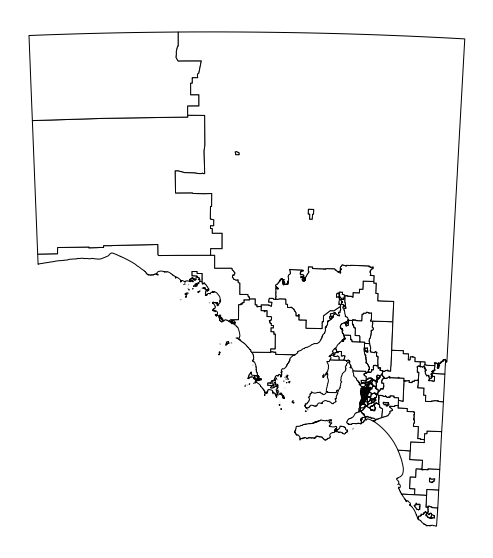

In [6]:
ax = sa2_south_au_proj.plot(facecolor='w', edgecolor='k', figsize = (10,10))
ax.set_axis_off()

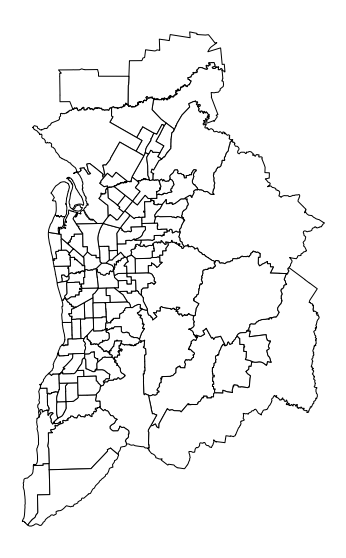

In [7]:
ax = sa2_adelaide_proj.plot(facecolor='w', edgecolor='k', figsize = (10,10))
ax.set_axis_off()

# Next

In [8]:
sa2_south_au_proj['centroids']=sa2_south_au_proj.centroid
sa2_adelaide_proj['centroids']=sa2_adelaide_proj.centroid

In [9]:
# reindex
sa2_south_au_proj.index=np.arange(sa2_south_au_proj.shape[0])
sa2_adelaide_proj.index=np.arange(sa2_adelaide_proj.shape[0])

In [10]:
sa2_south_au_proj

,SA2_MAIN16,SA2_5DIG16,SA2_NAME16,SA3_CODE16,SA3_NAME16,SA4_CODE16,SA4_NAME16,GCC_CODE16,GCC_NAME16,STE_CODE16,STE_NAME16,AREASQKM16,geometry,centroids
0,401011001,41001,Adelaide,40101,Adelaide City,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,South Australia,10.4824,"POLYGON ((417263.891 -3939518.653, 417262.345 ...",POINT (419063.221 -3939397.800)
1,401011002,41002,North Adelaide,40101,Adelaide City,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,South Australia,5.0909,"POLYGON ((417476.199 -3936647.849, 417544.905 ...",POINT (418661.427 -3937155.968)
2,401021003,41003,Adelaide Hills,40102,Adelaide Hills,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,South Australia,364.4390,"POLYGON ((433666.133 -3928044.498, 433628.032 ...",POINT (445193.899 -3927296.237)
3,401021004,41004,Aldgate - Stirling,40102,Adelaide Hills,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,South Australia,117.2141,"POLYGON ((427353.316 -3946292.628, 427421.744 ...",POINT (429990.745 -3951575.711)
4,401021005,41005,Hahndorf - Echunga,40102,Adelaide Hills,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,South Australia,110.1516,"POLYGON ((435785.372 -3950672.079, 435799.037 ...",POINT (434391.684 -3957940.977)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,407031166,41166,Murray Bridge Region,40703,Murray and Mallee,407,South Australia - South East,4RSAU,Rest of SA,4,South Australia,1924.5348,"POLYGON ((479426.305 -3945198.813, 479428.375 ...",POINT (481848.275 -3965240.939)
168,407031167,41167,Renmark,40703,Murray and Mallee,407,South Australia - South East,4RSAU,Rest of SA,4,South Australia,14.6561,"POLYGON ((617107.251 -3864707.656, 617162.717 ...",POINT (618997.764 -3864263.611)
169,407031168,41168,Renmark Region,40703,Murray and Mallee,407,South Australia - South East,4RSAU,Rest of SA,4,South Australia,901.2094,"POLYGON ((610857.840 -3860757.598, 610859.053 ...",POINT (625080.062 -3866233.854)
170,407031169,41169,The Coorong,40703,Murray and Mallee,407,South Australia - South East,4RSAU,Rest of SA,4,South Australia,8644.9956,"POLYGON ((450099.074 -4015396.321, 449800.781 ...",POINT (517135.724 -4029022.331)


# Visualize physical network of SA2

In [11]:
adelaide_queen=weights.contiguity.Queen.from_dataframe(sa2_adelaide_proj)
adelaide_queen

/home/jtl/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
 There is 1 island with id: 103.
  warnings.warn(message)


In [12]:
adelaide_queen.n

110

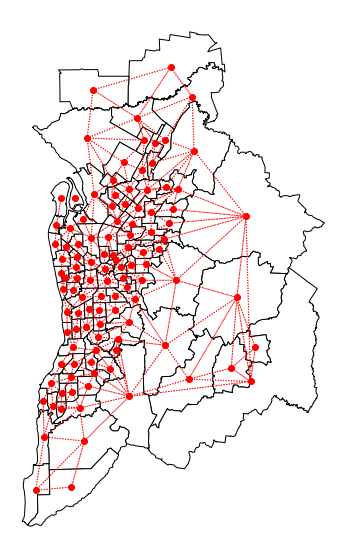

In [13]:
# vis the basic network connection in adelaide
ax = sa2_adelaide_proj.plot(edgecolor='k', facecolor='w', figsize = (10,10))
sa2_adelaide_proj.centroids.plot(ax = ax, facecolor='r')
adelaide_queen.plot(sa2_adelaide_proj, ax = ax, 
                  edge_kws=dict(color='r', linestyle=':', linewidth=1),
                  node_kws=dict(marker=''))
ax.set_axis_off()


In [14]:
sa2_adelaide_proj

,SA2_MAIN16,SA2_5DIG16,SA2_NAME16,SA3_CODE16,SA3_NAME16,SA4_CODE16,SA4_NAME16,GCC_CODE16,GCC_NAME16,STE_CODE16,STE_NAME16,AREASQKM16,geometry,centroids
0,401011001,41001,Adelaide,40101,Adelaide City,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,South Australia,10.4824,"POLYGON ((417263.891 -3939518.653, 417262.345 ...",POINT (419063.221 -3939397.800)
1,401011002,41002,North Adelaide,40101,Adelaide City,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,South Australia,5.0909,"POLYGON ((417476.199 -3936647.849, 417544.905 ...",POINT (418661.427 -3937155.968)
2,401021003,41003,Adelaide Hills,40102,Adelaide Hills,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,South Australia,364.4390,"POLYGON ((433666.133 -3928044.498, 433628.032 ...",POINT (445193.899 -3927296.237)
3,401021004,41004,Aldgate - Stirling,40102,Adelaide Hills,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,South Australia,117.2141,"POLYGON ((427353.316 -3946292.628, 427421.744 ...",POINT (429990.745 -3951575.711)
4,401021005,41005,Hahndorf - Echunga,40102,Adelaide Hills,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,South Australia,110.1516,"POLYGON ((435785.372 -3950672.079, 435799.037 ...",POINT (434391.684 -3957940.977)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,404031105,41105,Fulham,40403,West Torrens,404,Adelaide - West,4GADE,Greater Adelaide,4,South Australia,1.3212,"POLYGON ((410502.489 -3938804.420, 410496.375 ...",POINT (411149.918 -3938979.008)
106,404031106,41106,Lockleys,40403,West Torrens,404,Adelaide - West,4GADE,Greater Adelaide,4,South Australia,5.7020,"POLYGON ((411842.413 -3938239.458, 411857.841 ...",POINT (413367.138 -3938842.518)
107,404031107,41107,Plympton,40403,West Torrens,404,Adelaide - West,4GADE,Greater Adelaide,4,South Australia,10.6969,"POLYGON ((413778.862 -3941759.801, 413777.655 ...",POINT (414375.480 -3942463.664)
108,404031108,41108,Richmond (SA),40403,West Torrens,404,Adelaide - West,4GADE,Greater Adelaide,4,South Australia,8.9253,"POLYGON ((414829.341 -3937727.856, 414828.056 ...",POINT (415914.735 -3939208.012)


In [15]:
# use Queen connectivity.
network_queen = weights.contiguity.Queen.from_dataframe(sa2_south_au_proj)

/home/jtl/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
 There are 2 islands with ids: 103, 145.
  warnings.warn(message)


In [16]:
print(network_queen.n)

172


In [17]:
network_queen.neighbors

{0: [1, 107, 108, 12, 16, 18, 21, 22, 23, 93],
 1: [0, 18, 20, 21, 108, 93],
 2: [32, 165, 5, 7, 9, 110, 112, 49, 51, 54, 55],
 3: [65, 67, 4, 5, 11, 9, 75],
 4: [3, 5, 6, 7, 75],
 5: [2, 3, 4, 6, 7, 8, 9],
 6: [8, 4, 5, 7],
 7: [2, 4, 5, 165, 6, 8, 167, 75, 146, 147],
 8: [5, 6, 7],
 9: [2, 3, 5, 10, 11, 13, 15, 51],
 10: [16, 17, 18, 9, 11, 12, 15],
 11: [65, 3, 69, 23, 9, 10, 12],
 12: [0, 16, 23, 10, 11],
 13: [9, 51, 14, 15],
 14: [17, 51, 37, 13, 15],
 15: [17, 9, 10, 13, 14],
 16: [0, 17, 18, 10, 12],
 17: [16, 18, 37, 10, 14, 15],
 18: [0, 1, 16, 17, 37, 21, 10],
 19: [37, 35, 20, 21],
 20: [1, 35, 19, 21, 102, 93],
 21: [0, 1, 18, 19, 20, 37],
 22: [0, 68, 69, 23, 58, 107, 108],
 23: [0, 69, 22, 11, 12],
 24: [112, 113, 25, 26, 31, 111],
 25: [112, 32, 24, 27, 31],
 26: [24, 113, 34, 31],
 27: [32, 33, 25, 30, 31],
 28: [33, 34, 29, 46, 31],
 29: [33, 28, 30, 44, 45, 46],
 30: [32, 33, 29, 27, 45],
 31: [33, 34, 24, 25, 26, 27, 28],
 32: [2, 45, 112, 49, 50, 25, 27, 30],
 33: 

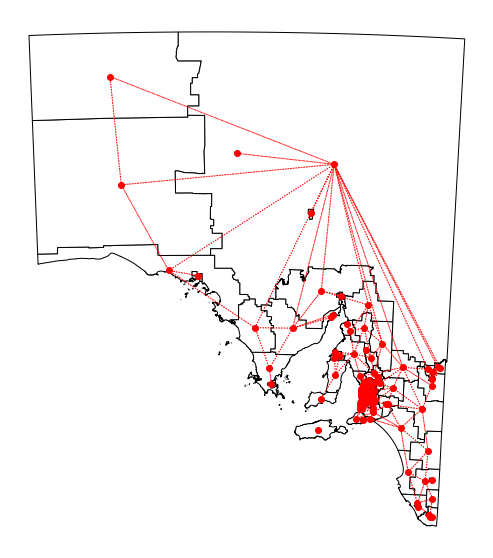

In [18]:
# vis the basic network connection
ax = sa2_south_au_proj.plot(edgecolor='k', facecolor='w', figsize = (10,10))
sa2_south_au_proj.centroids.plot(ax = ax, facecolor='r')
network_queen.plot(sa2_south_au_proj, ax = ax, 
                  edge_kws=dict(color='r', linestyle=':', linewidth=1),
                  node_kws=dict(marker=''))
ax.set_axis_off()


## Visualize road networks

In [19]:
sa2_roads = gpd.read_file("../data/roads/Roads_GDA2020.shp")

In [20]:
sa2_roads.head(5)

,persistent,featurecod,name,roadtype,typesuffix,class,surface,routenum,status,ontype,...,f_elev,t_elev,crrs_road_,cwy_code,tars_road_,suburbidle,suburbidri,last_edite,shape_Leng,geometry
0,3004811,2013,MULLALONG,TRACK,None,TRK4,UNSE,None,OPER,None,...,0.0,0.0,None,U,None,560713.0,560713.0,2016-04-15,0.010374,"LINESTRING (135.19097 -34.46315, 135.19094 -34..."
1,3004805,2013,MORGANS,TRACK,None,TRK4,UNSE,None,OPER,None,...,0.0,0.0,None,U,None,560713.0,560713.0,2016-04-15,0.001466,"LINESTRING (135.21053 -34.49383, 135.21057 -34..."
2,3004816,2013,POINT BURGESS,TRACK,None,TRK4,UNSE,None,OPER,None,...,0.0,0.0,None,U,None,560713.0,560713.0,2016-04-15,0.000529,"LINESTRING (135.21066 -34.44102, 135.21064 -34..."
3,3288022,2013,None,None,None,TRK2,UNSE,None,OPER,None,...,0.0,0.0,None,U,None,NaN,NaN,2015-11-18,0.000724,"LINESTRING (131.14305 -26.14934, 131.14318 -26..."
4,123120,2013,None,None,None,TRK4,UNSE,None,OPER,None,...,0.0,0.0,None,U,None,560713.0,560713.0,2016-04-15,0.002936,"LINESTRING (135.21190 -34.49340, 135.21178 -34..."


In [21]:
sa2_roads.columns

Index(['persistent', 'featurecod', 'name', 'roadtype', 'typesuffix', 'class',
       'surface', 'routenum', 'status', 'ontype', 'capturesou', 'capturemet',
       'featuresou', 'featurerel', 'attributer', 'horizontal', 'fa_auditda',
       'fa_class', 'fa_source', 'fa_method', 'fa_status', 'fa_validat',
       'roadusetyp', 'roaduseaut', 'road_id', 'one_way', 'f_elev', 't_elev',
       'crrs_road_', 'cwy_code', 'tars_road_', 'suburbidle', 'suburbidri',
       'last_edite', 'shape_Leng', 'geometry'],
      dtype='object')

In [22]:
sa2_roads_proj = sa2_roads.to_crs("epsg:3112")
sa2_roads_proj.crs

<Projected CRS: EPSG:3112>
Name: GDA94 / Geoscience Australia Lambert
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Australia - onshore
- bounds: (112.85, -43.7, 153.69, -9.86)
Coordinate Operation:
- name: Geoscience Australia Standard National Scale Lambert Projection
- method: Lambert Conic Conformal (2SP)
Datum: Geocentric Datum of Australia 1994
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

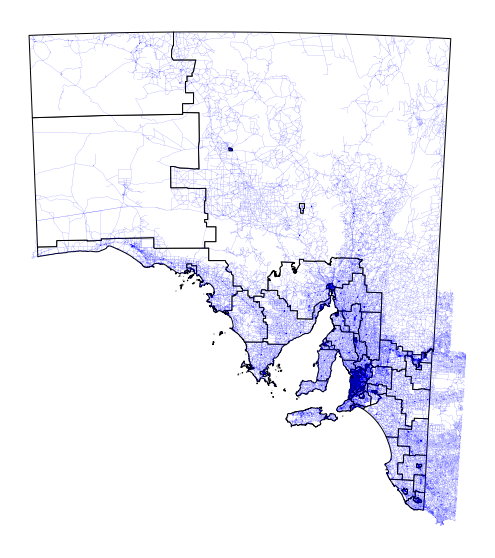

In [23]:
# vis
ax = sa2_south_au_proj.plot(edgecolor='k', facecolor='w', figsize = (10,10))
sa2_roads_proj.plot(ax = ax, edgecolor='b', linewidth=0.1)
ax.set_axis_off()


# Visualize mobility/transaction network

In [24]:
# read files
trans_mcc_df = pd.read_pickle("../data_process/trans_mcc_df.pkl")
trans_age_df = pd.read_pickle("../data_process/trans_age_df.pkl")
flow_df = pd.read_pickle("../data_process/flow_df.pkl")

In [26]:
flow_agg = trans_mcc_df.groupby(['source_sa2','target_sa2']).sum()
# flow_agg.ravel
flow_agg

count  amount
source_sa2 target_sa2               
401011001  401011001   27465   96782
           401011002   23025   26169
           401021004    4795   29550
           401021005    7101    5470
           401021006    4780    7353
...                      ...     ...
407031170  407031164    7140   23172
           407031165   13597   27366
           407031167   21184   58407
           407031168    7462   14185
           407031170   19225  106708

[8643 rows x 2 columns]

In [27]:
flow_agg.loc[('401011001','401011001'),'count'] # note this indexing

27465

In [28]:
flow_df

,timestamp,sa2,state,agent_home_sa2,unique_agents,sum_stay_duration,total_stays
1716,2018-02-01T00:00:00.000+11:00,401011001,4,401011001,19863,268779414,681217
1717,2018-02-01T00:00:00.000+11:00,401011002,4,401011001,6911,4857456,29322
1718,2018-02-01T00:00:00.000+11:00,401021003,4,401011001,404,253764,1334
1719,2018-02-01T00:00:00.000+11:00,401021004,4,401011001,1184,903377,5487
1720,2018-02-01T00:00:00.000+11:00,401021005,4,401011001,700,189721,1278
...,...,...,...,...,...,...,...
20800,2018-02-01T00:00:00.000+11:00,407031166,4,407031170,217,217437,499
20801,2018-02-01T00:00:00.000+11:00,407031167,4,407031170,945,353528,2096
20802,2018-02-01T00:00:00.000+11:00,407031168,4,407031170,580,285362,1599
20803,2018-02-01T00:00:00.000+11:00,407031169,4,407031170,50,3769,93


In [29]:
172*172

29584

In [30]:
sa2_south_au_proj

,SA2_MAIN16,SA2_5DIG16,SA2_NAME16,SA3_CODE16,SA3_NAME16,SA4_CODE16,SA4_NAME16,GCC_CODE16,GCC_NAME16,STE_CODE16,STE_NAME16,AREASQKM16,geometry,centroids
0,401011001,41001,Adelaide,40101,Adelaide City,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,South Australia,10.4824,"POLYGON ((417263.891 -3939518.653, 417262.345 ...",POINT (419063.221 -3939397.800)
1,401011002,41002,North Adelaide,40101,Adelaide City,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,South Australia,5.0909,"POLYGON ((417476.199 -3936647.849, 417544.905 ...",POINT (418661.427 -3937155.968)
2,401021003,41003,Adelaide Hills,40102,Adelaide Hills,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,South Australia,364.4390,"POLYGON ((433666.133 -3928044.498, 433628.032 ...",POINT (445193.899 -3927296.237)
3,401021004,41004,Aldgate - Stirling,40102,Adelaide Hills,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,South Australia,117.2141,"POLYGON ((427353.316 -3946292.628, 427421.744 ...",POINT (429990.745 -3951575.711)
4,401021005,41005,Hahndorf - Echunga,40102,Adelaide Hills,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,South Australia,110.1516,"POLYGON ((435785.372 -3950672.079, 435799.037 ...",POINT (434391.684 -3957940.977)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,407031166,41166,Murray Bridge Region,40703,Murray and Mallee,407,South Australia - South East,4RSAU,Rest of SA,4,South Australia,1924.5348,"POLYGON ((479426.305 -3945198.813, 479428.375 ...",POINT (481848.275 -3965240.939)
168,407031167,41167,Renmark,40703,Murray and Mallee,407,South Australia - South East,4RSAU,Rest of SA,4,South Australia,14.6561,"POLYGON ((617107.251 -3864707.656, 617162.717 ...",POINT (618997.764 -3864263.611)
169,407031168,41168,Renmark Region,40703,Murray and Mallee,407,South Australia - South East,4RSAU,Rest of SA,4,South Australia,901.2094,"POLYGON ((610857.840 -3860757.598, 610859.053 ...",POINT (625080.062 -3866233.854)
170,407031169,41169,The Coorong,40703,Murray and Mallee,407,South Australia - South East,4RSAU,Rest of SA,4,South Australia,8644.9956,"POLYGON ((450099.074 -4015396.321, 449800.781 ...",POINT (517135.724 -4029022.331)


In [31]:
# full SA graph
network_full = weights.KNN.from_dataframe(sa2_south_au_proj, k = 171)
print(network_full.histogram)
print(network_full.weights)


[(171, 172)]
{0: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 1: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.

In [32]:
# assign weights.
map_df = sa2_south_au_proj.SA2_MAIN16
map_df

0      401011001
1      401011002
2      401021003
3      401021004
4      401021005
         ...    
167    407031166
168    407031167
169    407031168
170    407031169
171    407031170
Name: SA2_MAIN16, Length: 172, dtype: object

In [33]:
# edit graph weights by flow
for i in network_full.weights.keys(): # i is the first idx of the full graph
    for j in np.arange(len(network_full.weights[i])): # j is the second idx of the graph
        i_sa2 = map_df[i]
        j_sa2 = map_df[j]
        try:
            network_full.weights[i][j] = flow_agg.loc[(i_sa2, j_sa2), 'count'] # Do you need normalization?
        except KeyError:
            network_full.weights[i][j] = 0
#         print(network_full.weights[i][j])
print(network_full.weights)


{0: [27465, 23025, 0, 4795, 7101, 4780, 18373, 0, 0, 3233, 12620, 14772, 26875, 0, 5865, 10465, 30790, 15316, 27162, 10362, 27766, 9882, 19738, 37727, 0, 3317, 0, 0, 0, 8266, 0, 0, 0, 0, 0, 13484, 8929, 8388, 0, 9261, 0, 0, 0, 0, 0, 0, 0, 9754, 0, 5941, 0, 0, 12684, 0, 0, 0, 9472, 20995, 26112, 0, 0, 6666, 8838, 0, 15681, 0, 135, 2223, 17805, 17181, 3871, 0, 7029, 7721, 4159, 0, 0, 0, 0, 0, 0, 0, 0, 6960, 0, 0, 0, 6688, 0, 0, 7105, 7334, 5327, 18785, 0, 3086, 15300, 21298, 0, 6269, 1902, 15051, 6573, 0, 25522, 0, 8603, 22639, 27831, 3487, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6107, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1540, 0, 0, 0, 1714, 0, 7398, 1181, 0, 2256, 10431, 4070, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1986, 1702, 0, 0, 3469, 13174, 0, 1674, 0, 2393], 1: [34483, 28989, 0, 10756, 0, 3451, 3926, 0, 0, 0, 9335, 5648, 21737, 0, 4702, 7684, 32523, 16953, 24185, 6019, 24775, 4409, 4782, 21899, 0, 0, 0, 0, 0, 4851, 0, 0, 0, 0, 0, 24959, 3071, 3547, 0, 0, 0, 0, 0, 0, 4183, 0, 0, 101

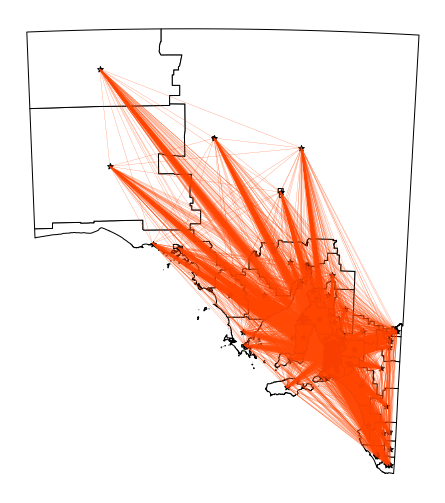

In [34]:
# plot
f,ax = plt.subplots(1, figsize=(9, 9))
sa2_south_au_proj.plot(ax=ax, facecolor='w', edgecolor='k')
network_full.plot(sa2_south_au_proj, edge_kws=dict(linewidth=0.2, color='orangered', alpha=0.5), 
                  node_kws=dict(marker='*'), ax=ax)
ax.set_axis_off()


In [35]:
# Adelaide network

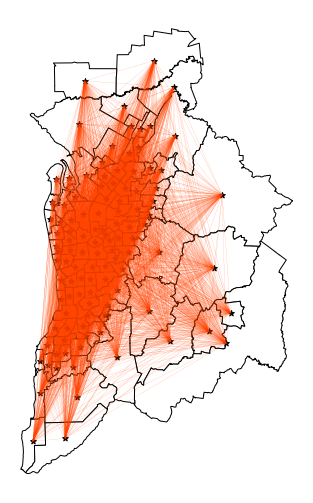

In [36]:
# full Adelaide graph
network_adl = weights.KNN.from_dataframe(sa2_adelaide_proj, k = 109)
map_adl = sa2_adelaide_proj.SA2_MAIN16 # create a map

# edit graph weights by flow
for i in network_adl.weights.keys(): # i is the first idx of the full graph
    for j in np.arange(len(network_adl.weights[i])): # j is the second idx of the graph
        i_sa2 = map_adl[i]
        j_sa2 = map_adl[j]
        try:
            network_adl.weights[i][j] = flow_agg.loc[(i_sa2, j_sa2), 'count'] # Do you need normalization?
        except KeyError:
            network_adl.weights[i][j] = 0
#         print(network_full.weights[i][j])
# print(network_adl.weights)

# vis
# plot
f,ax = plt.subplots(1, figsize=(9, 9))
sa2_adelaide_proj.plot(ax=ax, facecolor='w', edgecolor='k')
network_adl.plot(sa2_adelaide_proj, edge_kws=dict(linewidth=0.1, color='orangered', alpha=0.5), 
                  node_kws=dict(marker='*'), ax=ax)
ax.set_axis_off()


In [74]:
network_full.weights[i][j]

27465

In [75]:
i

0

In [63]:
network_full.weights[i,j]

2393

In [69]:
network_full.weights

{0: [1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1

In [76]:
j

0

In [64]:
print(network_full.weights[i,j])

2393


In [68]:
network_full.weights.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, (0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19), (0, 20), (0, 21), (0, 22), (0, 23), (0, 24), (0, 25), (0, 26), (0, 27

In [67]:
np.arange(len(network_full.weights[1]))

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170])

In [50]:
network_full.weights

{0: [1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1

In [47]:
network_full.weights[0]

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0

In [33]:
sa2_south_au_proj

,SA2_MAIN16,SA2_5DIG16,SA2_NAME16,SA3_CODE16,SA3_NAME16,SA4_CODE16,SA4_NAME16,GCC_CODE16,GCC_NAME16,STE_CODE16,STE_NAME16,AREASQKM16,geometry,centroids
0,401011001,41001,Adelaide,40101,Adelaide City,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,South Australia,10.4824,"POLYGON ((417263.891 -3939518.653, 417262.345 ...",POINT (419063.221 -3939397.800)
1,401011002,41002,North Adelaide,40101,Adelaide City,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,South Australia,5.0909,"POLYGON ((417476.199 -3936647.849, 417544.905 ...",POINT (418661.427 -3937155.968)
2,401021003,41003,Adelaide Hills,40102,Adelaide Hills,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,South Australia,364.4390,"POLYGON ((433666.133 -3928044.498, 433628.032 ...",POINT (445193.899 -3927296.237)
3,401021004,41004,Aldgate - Stirling,40102,Adelaide Hills,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,South Australia,117.2141,"POLYGON ((427353.316 -3946292.628, 427421.744 ...",POINT (429990.745 -3951575.711)
4,401021005,41005,Hahndorf - Echunga,40102,Adelaide Hills,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,South Australia,110.1516,"POLYGON ((435785.372 -3950672.079, 435799.037 ...",POINT (434391.684 -3957940.977)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,407031166,41166,Murray Bridge Region,40703,Murray and Mallee,407,South Australia - South East,4RSAU,Rest of SA,4,South Australia,1924.5348,"POLYGON ((479426.305 -3945198.813, 479428.375 ...",POINT (481848.275 -3965240.939)
168,407031167,41167,Renmark,40703,Murray and Mallee,407,South Australia - South East,4RSAU,Rest of SA,4,South Australia,14.6561,"POLYGON ((617107.251 -3864707.656, 617162.717 ...",POINT (618997.764 -3864263.611)
169,407031168,41168,Renmark Region,40703,Murray and Mallee,407,South Australia - South East,4RSAU,Rest of SA,4,South Australia,901.2094,"POLYGON ((610857.840 -3860757.598, 610859.053 ...",POINT (625080.062 -3866233.854)
170,407031169,41169,The Coorong,40703,Murray and Mallee,407,South Australia - South East,4RSAU,Rest of SA,4,South Australia,8644.9956,"POLYGON ((450099.074 -4015396.321, 449800.781 ...",POINT (517135.724 -4029022.331)


## Visualize network centrality metrics

In [ ]:
# Step 1. Create network with weights



In [ ]:
# Step 2. Compute centrality metrics.



In [ ]:
# Step 3. Vis

